In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
mpl.rcParams['figure.figsize']=12,8
from datetime import datetime
from fbprophet import Prophet

data=pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv',encoding='utf-8')
data['date']=data['year'].map(str)+'-'+data['month'].map(str)+'-'+data['day'].map(str)+" "+data['hour'].map(str)+":00:00"
data=data.drop(columns=['year','month','day','hour','No'],axis=1)
data1=data[24:].reset_index()
data1.drop(['index'],inplace=True,axis=1)
data1.columns=['pollution','dew','temp','pressure','dir','speed','snow','rain','date']
data1.head()

,pollution,dew,temp,pressure,dir,speed,snow,rain,date
0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-1-2 0:00:00
1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-1-2 1:00:00
2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-1-2 2:00:00
3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-1-2 3:00:00
4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-1-2 4:00:00


In [81]:
data2=data1[['date','speed']]
data2.columns=['ds','y']
# scaler=MinMaxScaler(feature_range=(0,1))
# scaled_d=scaler.fit_transform(data2[['y']])
scaled_data=data2
# scaled_data2=pd.concat([data2['ds'],pd.DataFrame(scaled_d)],axis=1)
# scaled_data2.columns=['ds','y']
scaled_data2=scaled_data
scaled_data.head()

scaled_data2.loc['ds']=pd.to_datetime(scaled_data['ds'])
scaled_data2.set_index("ds",inplace=True)
scaled_data2=scaled_data2.dropna()
scaled_data2

D:\anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,y
ds,
2010-1-2 0:00:00,1.79
2010-1-2 1:00:00,2.68
2010-1-2 2:00:00,3.57
2010-1-2 3:00:00,5.36
2010-1-2 4:00:00,6.25
...,...
2014-12-31 19:00:00,231.97
2014-12-31 20:00:00,237.78
2014-12-31 21:00:00,242.70


In [171]:
def plot_origin(data,hourstart=0,hourend):
    data=data[hourstart:hourend]
    plt.scatter([range(0,hourend-hourstart)],data)
    plt.grid(alpha=0.5)
    plt.title('origin data',fontsize=20)
    plt.xlabel('hours',fontsize=15)
    plt.ylabel('wind speed',fontsize=15)

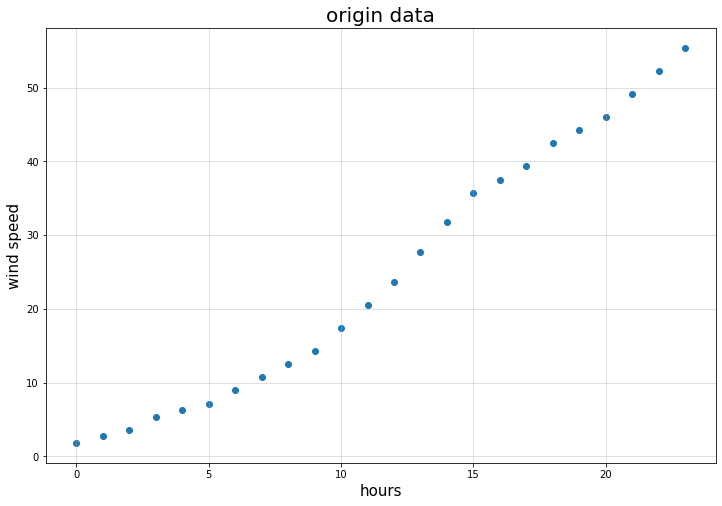

In [219]:
plot_origin(scaled_data2,0,24)

In [245]:
def myProphet(data,hourstart,hourend,preday):
    global m,future,forecast
    data=data[hourstart:hourend]
    daily_spd = data['y']
    data3 = pd.DataFrame(daily_spd)
    data3.reset_index(inplace=True)
    data3.columns = ['ds','y']
#     m=Prophet(daily_seasonality=False)
    m=Prophet()
    m.fit(data3)
    future = m.make_future_dataframe(periods=preday)
    future=future.dropna()
    forecast=m.predict(future)
    m.plot(forecast,ylabel='Wind Production')
    plt.title('Forecasted Wind Production')
    print("Future Wind Production")
    forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


Future Wind Production


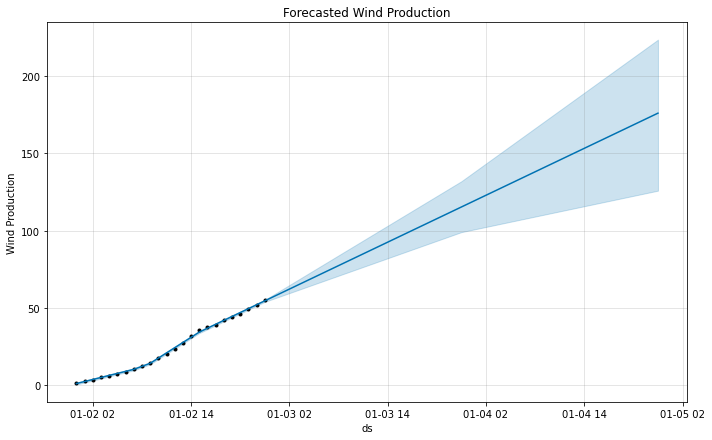

In [249]:
myProphet(scaled_data2,0,24,2)

In [250]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-02 00:00:00,1.228129,0.576806,1.877942,1.228129,1.228129,0.0,0.0,0.0,0.0,0.0,0.0,1.228129
1,2010-01-02 01:00:00,2.537294,1.894489,3.188846,2.537294,2.537294,0.0,0.0,0.0,0.0,0.0,0.0,2.537294
2,2010-01-02 02:00:00,3.846459,3.144383,4.488235,3.846459,3.846459,0.0,0.0,0.0,0.0,0.0,0.0,3.846459
3,2010-01-02 03:00:00,5.155625,4.449442,5.787386,5.155625,5.155625,0.0,0.0,0.0,0.0,0.0,0.0,5.155625
4,2010-01-02 04:00:00,6.464949,5.782411,7.149902,6.464949,6.464949,0.0,0.0,0.0,0.0,0.0,0.0,6.464949
5,2010-01-02 05:00:00,7.775100,7.164394,8.454632,7.775100,7.775100,0.0,0.0,0.0,0.0,0.0,0.0,7.775100
6,2010-01-02 06:00:00,9.087542,8.421841,9.739542,9.087542,9.087542,0.0,0.0,0.0,0.0,0.0,0.0,9.087542
7,2010-01-02 07:00:00,10.404028,9.748762,11.050523,10.404028,10.404028,0.0,0.0,0.0,0.0,0.0,0.0,10.404028
8,2010-01-02 08:00:00,12.357234,11.670010,13.022375,12.357234,12.357234,0.0,0.0,0.0,0.0,0.0,0.0,12.357234
9,2010-01-02 09:00:00,14.311351,13.640021,14.948577,14.311351,14.311351,0.0,0.0,0.0,0.0,0.0,0.0,14.311351


In [239]:
def mycompare(data,res,sethour,preday):
    data=data[:len(res)]['speed']
    forecast_yhat=res['yhat'][:sethour+24*preday]
    plt.scatter([range(0,sethour)],data[:sethour],label='origin data',color='pink')
    plt.scatter([range(sethour,len(data))],data[sethour:],label='origin data',color='red')
    plt.plot(forecast_yhat[:sethour+24*preday],label='predict data',color='black')
    plt.grid(alpha=0.5)
    plt.legend(fontsize=15)
    plt.title('data compare',fontsize=20)
    plt.xlabel('hours',fontsize=15)
    plt.ylabel('wind speed',fontsize=15)

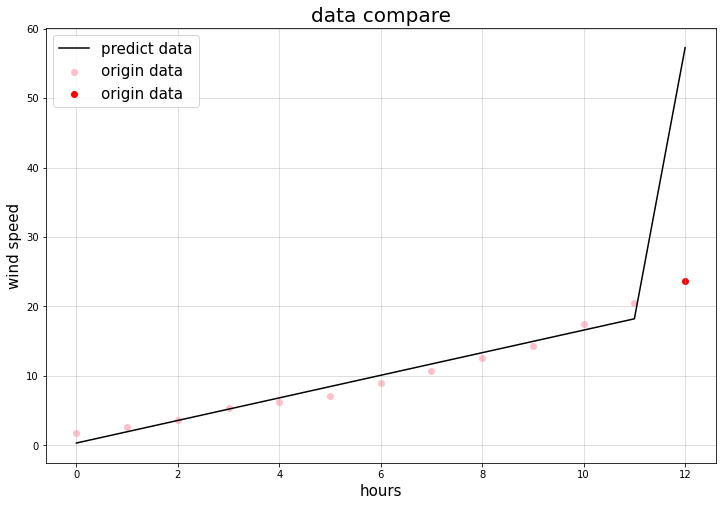

In [240]:
mycompare(data1,forecast,12,1)